In [89]:
import qutip as qutip
import numpy as np
from qutip import *
import matplotlib.pyplot as plt

Sigma_x=qutip.sigmax()
Sigma_y=qutip.sigmay()
Sigma_z=qutip.sigmaz()

Omega_I=0
Omega_Q=1

Psi0=qutip.basis(2, 0)   #|0>

Hamil=0.5*Omega_I*Sigma_x+0.5*Omega_Q*Sigma_y

In [90]:
times = np.linspace(0.0, 2*np.pi, 2000)
result = sesolve(Hamil, Psi0, times, [Sigma_x,Sigma_y,Sigma_z])
result1 = sesolve(Hamil, Psi0, times, [])


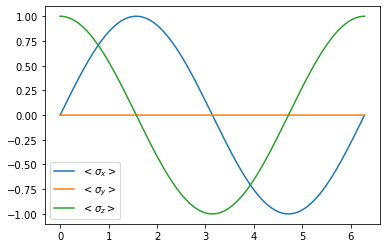

In [91]:
plt.plot(times,result.expect[0],label="$<\sigma_x>$")
plt.plot(times,result.expect[1],label="$<\sigma_y>$")
plt.plot(times,result.expect[2],label="$<\sigma_z>$")




plt.legend()

In [92]:
max(result.expect[0]-1)

-3.0845207343865866e-07

In [93]:
np.argmax(result.expect[0]-1)

500

In [94]:
result1 = sesolve(Hamil, Psi0, times, [])


In [95]:
Est_plus=result1.states[np.argmax(result.expect[0]-1)]  #Getting |+>

In [96]:
Est_minus=result1.states[np.argmin(result.expect[0]-1)]  #Getting |->

In [118]:
Est_minus

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.70682853]
 [ 0.70738493]]

In [97]:
# The time required is:

times[np.argmax(result.expect[0]-1)]   #|+>

1.5715821178538234

In [98]:
# The time required is:

times[np.argmin(result.expect[0]-1)]   #|->

4.711603189325762

In [99]:
Ket_plus=(1/np.sqrt(2))*(qutip.basis(2, 0)+qutip.basis(2, 1))
Ket_minus=(1/np.sqrt(2))*(qutip.basis(2, 0)-qutip.basis(2, 1))

In [102]:
fidelity(Ket_plus, Est_plus)

0.9999999228869784

In [104]:
fidelity(Ket_plus, Ket_plus)

0.9999999999999997

In [103]:
fidelity(Ket_minus, Est_minus)

0.99999992260416

In [105]:
fidelity(Ket_minus, Ket_minus)

0.9999999999999997

In [145]:
import qutip as qutip
import numpy as np
from qutip import *
import matplotlib.pyplot as plt

Sigma_x=qutip.sigmax()
Sigma_y=qutip.sigmay()
Sigma_z=qutip.sigmaz()


Psi0=qutip.basis(2, 0)   #|0>

Hamil=0.5*Omega_I*Sigma_x+0.5*Omega_Q*Sigma_y

In [146]:
tensor(Sigma_x,Sigma_x)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

In [179]:

g=3
Psi0=tensor(Est_plus,-Est_minus)
Hamil_XX = 0.5*g*(tensor(Sigma_x,Sigma_x) + tensor(Sigma_y,Sigma_y))
result = sesolve(Hamil_XX, Psi0, times, [])


In [180]:
U_iswap = iswap()


<ipython-input-180-b3d1fbfeedb7>:1: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  U_iswap = iswap()


In [181]:
Psi_t=U_iswap*Psi0

In [182]:
Den_des=Psi_t*(Psi_t.conj()).trans()

In [183]:
Psi_t

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.49960692+0.j        ]
 [ 0.        +0.49999949j]
 [ 0.        -0.50000021j]
 [-0.50039308+0.j        ]]

In [184]:
def dens(ket):
    
    return ket*(ket.conj()).trans()



norm_dif=[]

import time

t0=time.time()


for time in range(len(times)):
    
    norm_dif.append(np.linalg.norm( dens(result.states[time])- Den_des ) )
    


In [186]:
min(norm_dif)

0.0006321150943798213

In [172]:
dens(result.states[0])- Den_des 

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.00000000e+00+0.j         -2.49803565e-01+0.24980321j
   2.49803205e-01-0.24980356j  0.00000000e+00+0.j        ]
 [-2.49803565e-01-0.24980321j  7.19500334e-07+0.j
   0.00000000e+00+0.j          2.50196641e-01+0.25019628j]
 [ 2.49803205e-01+0.24980356j  0.00000000e+00+0.j
  -7.19500334e-07+0.j         -2.50196281e-01-0.25019664j]
 [ 0.00000000e+00+0.j          2.50196641e-01-0.25019628j
  -2.50196281e-01+0.25019664j  0.00000000e+00+0.j        ]]